In [1]:
 #Load common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Assign colum names to the dataset
names = ["age", "workclass", "fnlwgt","education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "class"]

# Load data
train = pd.read_csv("./data/adult.data", names=names, na_values="?")
test = pd.read_csv("./data/adult.test", names=names, na_values="?")

In [3]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# These are the columns which have missing values
columns_with_na_vals = ['workclass', 'occupation', 'native_country']

In [6]:
# Unfortunately, the missing values are marked as ?, so we need to convert them to 'NaN'
for col in columns_with_na_vals:
    train[col] = (train[col].replace(to_replace=' ?', value=np.nan))
    
for col in columns_with_na_vals:
    test[col] = (test[col].replace(to_replace=' ?', value=np.nan))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         15318 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16007 non-null object
class             16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [9]:
# Now we can drop the missing values
train = train.dropna()

In [10]:
train.shape

(30162, 15)

In [11]:
test = test.dropna()

In [12]:
test.shape

(15060, 15)

In [13]:
cat_names = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
num_names = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

In [14]:
# Write an own class to encode the categorical variables, because LabelEncoder can only handle one column
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns  = columns
        self.encoders = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        return output

encoder = EncodeCategorical(cat_names)

train_tr = encoder.fit_transform(train)
test_tr = encoder.fit_transform(test)

In [15]:
# Split to train and test set
X_train = train_tr.drop("class", axis=1)
y_train = train_tr["class"].copy()

X_test = test_tr.drop("class", axis=1)
y_test = test_tr["class"].copy()
y_test = y_test.replace([' <=50K.', ' >50K.'], [' <=50K', ' >50K'])  # different labels in y_test

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [1, 5, 10, 50, 100]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

tree_model = grid_search.best_estimator_

Best parameters:  {'max_depth': 10}
0.7510775147536636 {'max_depth': 1}
0.844937338372787 {'max_depth': 5}
0.8481533054837213 {'max_depth': 10}
0.8041907035342484 {'max_depth': 50}
0.8034281546316557 {'max_depth': 100}


In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
nb_model = classifier

In [18]:
# k Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {"n_neighbors": [5], "metric": ["euclidean"]}
]

classifier = KNeighborsClassifier(n_jobs=1)
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("All results:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

kNN_model = grid_search.best_estimator_

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 5}
All results:
0.7679862078111531 {'metric': 'euclidean', 'n_neighbors': 5}


============================== kNN ==============================
Classfication report
              precision    recall  f1-score   support

       <=50K       0.81      0.91      0.86     11360
        >50K       0.55      0.32      0.41      3700

   micro avg       0.77      0.77      0.77     15060
   macro avg       0.68      0.62      0.63     15060
weighted avg       0.74      0.77      0.75     15060

Confusion matrix


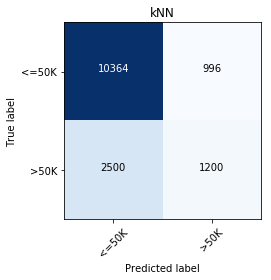

============================== Naive Bayes ==============================
Classfication report
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.65      0.31      0.42      3700

   micro avg       0.79      0.79      0.79     15060
   macro avg       0.73      0.63      0.64     15060
weighted avg       0.77      0.79      0.76     15060

Confusion matrix


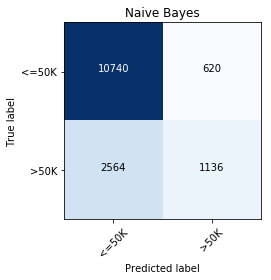

============================== Decision Tree ==============================
Classfication report
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90     11360
        >50K       0.72      0.63      0.67      3700

   micro avg       0.85      0.85      0.85     15060
   macro avg       0.80      0.78      0.79     15060
weighted avg       0.84      0.85      0.85     15060

Confusion matrix


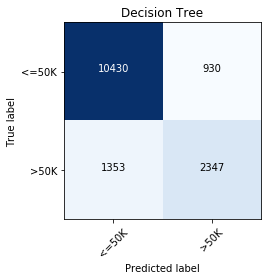

In [19]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=10)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


models = {'kNN': kNN_model, 'Naive Bayes': nb_model, 'Decision Tree': tree_model}

class_names = ['<=50K', '>50K']

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # make predictions on test set
    
    # Print evaluation results
    print(f"============================== {name} ==============================")
    
    # Print classification report
    print("Classfication report")
    print(classification_report(y_test, y_pred))
    
    # Compute confusion matrix
    print("Confusion matrix")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title=name)
    plt.show()